**[MLE-01]** 모듈을 임포트한다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

In [2]:
n0, mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
data0
df0 = DataFrame(data0, columns=['x1','x2'])
df0

,x1,x2
0,8.256155,16.278148
1,16.755246,1.565784
2,6.232979,12.398833
3,13.113993,8.935036
4,8.642944,14.522146
5,15.845627,9.452866
6,11.187450,12.673007
7,10.454037,2.569079
8,8.388358,4.623549
9,13.002586,11.714308


**[MLE-02]** 트레이닝 세트 데이터를 준비한다.

In [3]:
np.random.seed(20160512)

n0, mu0, variance0 = 10, [5, 6], 3
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x1','x2'])
df0['t'] = 0

n1, mu1, variance1 = 15, [1, 2], 2
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x1','x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [4]:
print(df.reindex(permutation(df.index)).reset_index(drop=True))

          x1        x2  t
0  -0.420286  4.032325  1
1   7.518957  7.427227  0
2   0.044695  1.108426  1
3   1.009070 -0.565796  1
4   5.037699  8.525932  0
5  -0.477510  0.575483  1
6   1.802702  2.847633  1
7   7.498152  4.166313  0
8   2.015487  1.611746  1
9   3.850851  6.493310  0
10  1.158426  3.898184  1
11  1.569683  0.763375  1
12  1.522939  1.567479  1
13  6.389215  3.822238  0
14  1.419753  2.598622  1
15 -1.295065  1.550041  1
16  0.106064  0.112227  1
17 -1.221018  3.905991  1
18  4.677399  5.294667  0
19  0.570064  1.545249  1
20  2.845129  4.066918  0
21  4.590259  4.830701  0
22  1.538011 -1.163311  1
23  2.500935  4.940887  0
24  6.625600  5.965118  0


In [5]:
df1

,x1,x2,t
0,0.044695,1.108426,1
1,1.158426,3.898184,1
2,1.538011,-1.163311,1
3,-0.420286,4.032325,1
4,-0.477510,0.575483,1
5,1.522939,1.567479,1
6,0.106064,0.112227,1
7,1.419753,2.598622,1
8,0.570064,1.545249,1
9,-1.295065,1.550041,1


**[MLE-03]** 트레이닝 세트 데이터의 내용을 확인한다.

In [6]:
train_set[['x1','x2']]

,x1,x2
0,5.037699,8.525932
1,4.677399,5.294667
2,6.625600,5.965118
3,6.389215,3.822238
4,-1.221018,3.905991
5,1.538011,-1.163311
6,0.570064,1.545249
7,2.015487,1.611746
8,1.158426,3.898184
9,0.106064,0.112227


**[MLE-04]** (x1, x2)와 t를 각각 모은 것을 NumPy의 array 오브젝트로 추출해둔다.

In [7]:
train_x = train_set[['x1','x2']].values
train_t = train_set['t'].values.reshape([len(train_set), 1])
train_t

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

**[MLE-05]** 트레이닝 세트 데이터에 대해 t=1일 확률을 구하는 계산식 p를 준비한다.

In [8]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x, w) + w0
p = tf.sigmoid(f)

**[MLE-06]** 오차 함수 loss와 트레이닝 알고리즘 train_step을 정의한다.

In [9]:
t = tf.placeholder(tf.float32, [None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

**[MLE-07]** 정답률 accuracy를 정의한다.

In [10]:
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**[MLE-08]** 세션을 준비하고 Variable을 초기화한다.

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

**[MLE-09]** 경사 하강법에 의한 파라미터 최적화를 20000회 반복한다.

In [12]:
i = 0
for _ in range(4000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 2000 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f, Accuracy: %f' % (i, loss_val, acc_val))

Step: 2000, Loss: 6.196881, Accuracy: 1.000000
Step: 4000, Loss: 3.569861, Accuracy: 1.000000


**[MLE-10]** 이 시점의 파라미터 값을 추출한다.

In [13]:
w0_val, w_val = sess.run([w0, w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print (w0_val, w1_val, w2_val)

3.1746693 -0.9555806 -0.29440928


**[MLE-11]** 추출한 파라미터 값을 이용해 결과를 그래프로 출력한다.

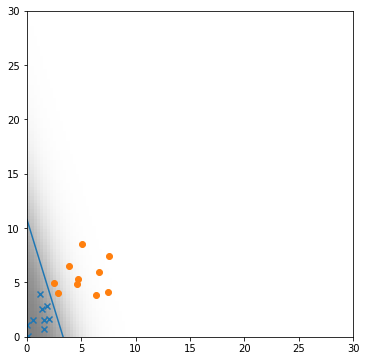

In [14]:
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

linex = np.linspace(0,30,10)
liney = - (w1_val*linex/w2_val + w0_val/w2_val)
subplot.plot(linex, liney)

field = [[(1 / (1 + np.exp(-(w0_val + w1_val*x1 + w2_val*x2))))
          for x1 in np.linspace(0,30,100)]
         for x2 in np.linspace(0,30,100)]
subplot.imshow(field, origin='lower', extent=(0,30,0,30),
               cmap=plt.cm.gray_r, alpha=0.5)